F_onewayResult(statistic=365.15209932892606, pvalue=1.2919164151427494e-157)

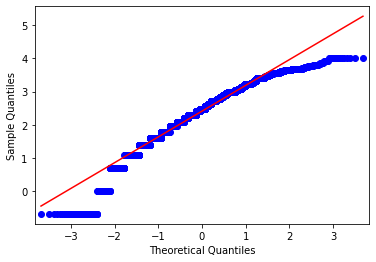

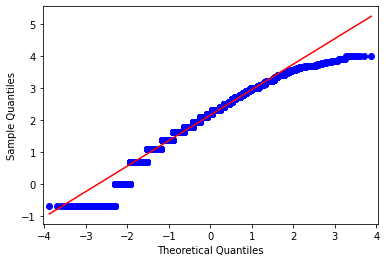

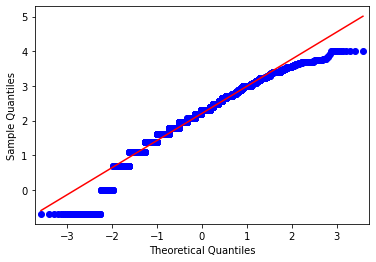

In [17]:
import numpy as np
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import f_oneway
import statsmodels.api as sm

path ="/content/drive/MyDrive/data.csv"
data=pd.read_csv(path)

data = data.replace('NA', np.nan)

data = data.replace('NA', np.nan)

lang_desired_dotnet= data['WebframeDesireNextYear'].str.contains('ASP.NET Core', na= False)
years_dotnet=data[lang_desired_dotnet]['YearsCode']
lang_desired_react= data['WebframeDesireNextYear'].str.contains('React.js', na= False)
years_react=data[lang_desired_react]['YearsCode']
lang_desired_spring= data['WebframeDesireNextYear'].str.contains('Spring', na= False)
years_spring=data[lang_desired_spring]['YearsCode']

years_dotnet=years_dotnet.dropna()
years_react=years_react.dropna()
years_spring=years_spring.dropna()


years_dotnet = years_dotnet.replace('Less than 1 year',0.5)
years_dotnet = years_dotnet.replace('More than 50 years',55)

years_react = years_react.replace('Less than 1 year',0.5)
years_react = years_react.replace('More than 50 years',55)

years_spring = years_spring.replace('Less than 1 year',0.5)
years_spring = years_spring.replace('More than 50 years',55)


years_dotnet=pd.to_numeric(years_dotnet)
years_react=pd.to_numeric(years_react)
years_spring=pd.to_numeric(years_spring)

years_dotnet=years_dotnet[years_dotnet>0]
years_react=years_react[years_react>0]
years_spring=years_spring[years_spring>0]


sm.qqplot(np.log(years_dotnet), line='r')
sm.qqplot(np.log(years_react), line='r')
sm.qqplot(np.log(years_spring), line='r')


f_oneway(years_dotnet, years_react, years_spring)








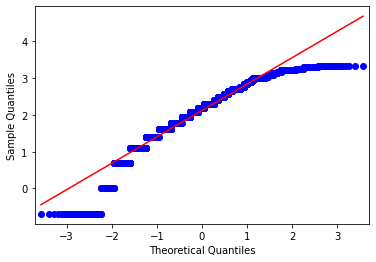

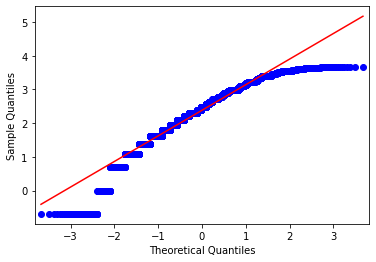

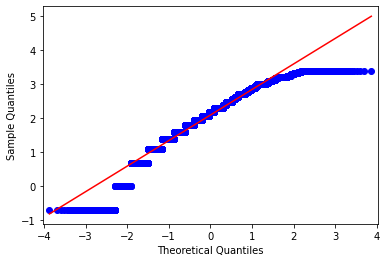

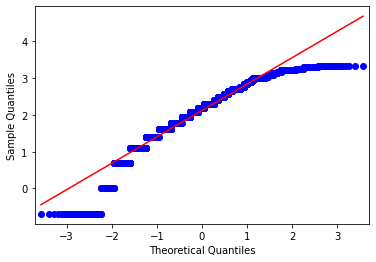

In [20]:
l=years_dotnet.quantile(.25)
u= years_dotnet.quantile(.75)
IQR=u-l
upper_limit= u+1.5*IQR
lower_limit= l-1.5*IQR
years_dotnet=years_dotnet[(years_dotnet<=upper_limit) & (years_dotnet>=lower_limit)]

l=years_react.quantile(.25)
u= years_react.quantile(.75)
IQR=u-l
upper_limit= u+1.5*IQR
lower_limit= l-1.5*IQR
years_react=years_react[(years_react<=upper_limit) & (years_react>=lower_limit)]

l=years_spring.quantile(.25)
u= years_spring.quantile(.75)
IQR=u-l
upper_limit= u+1.5*IQR
lower_limit= l-1.5*IQR
years_spring=years_spring[(years_spring<=upper_limit) & (years_spring>=lower_limit)]

sm.qqplot(np.log(years_dotnet), line = 'r')
sm.qqplot(np.log(years_react), line = 'r')
sm.qqplot(np.log(years_spring), line = 'r')



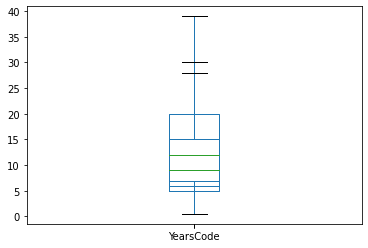

In [19]:

years_dotnet.plot.box()
years_react.plot.box()
years_spring.plot.box()
